In [47]:
from jitcdde import t
# from parameters import *
from parameters_h_overall import *
import matplotlib.pyplot as plt
from msrDynamics import Node, System

In [48]:
# for estimation case

# params = [1.76e-03, 13.3e-03, 0.88e-03, 21.7e-03,
#           1.06e-03, 22.4e-03, 738e-03, 27.5e-03,
#           0.47e-03, 1.83e-03, 68.3e-03, 3.77594444e+02]

# params = [0.02187095, 0.0113666, 0.00104331, 0.00415982, 0.00266767, 0.0093217, 0.00080961, 0.00687754, 0.19685921, 0.00049369, 0.0741425] # sumsq_power

# params = [2.26103880e-02, 6.35249293e-03, 5.01754655e-05, 7.79148981e-03,
#           4.50255426e-03, 1.05622729e-02, 1.26345367e-03, 6.71738834e-03,
#           1.02512617e-01, 2.30353891e-03, 7.33258046e-03]

params = [0.0169877,  0.00501597, 0.00060885, 0.00862134, 0.00350632, 
          0.01010759, 0.00213548, 0.00570137, 0.07343354, 0.00174456, 
          0.01248193]


hA_ft_c, hA_tc_c, hA_mc_c, hA_ft_hx, hA_ht_hx, hA_ct_hx, hA_th_hxch, \
hA_ht_hxhw, hA_tw_hxhw, hA_ht_hxhwc, hA_tw_hxhwc = params

sol_list_temps = [1042.57199866044,
 1101.32313244124,
 1051.91592285137,
 970.769412673833,
 997.379190630743,
 1366.92722109054,
 985.222848792895,
 926.758565332146,
 867.454095392284,
 592.426389465802,
 707.094140376782,
 985.222848792895,
 926.758565332146,
 867.454095392283,
 592.426389465803,
 707.094140376782,
 956.050399922537,
 936.170881868316,
 917.746236686024,
 724.690450510263,
 842.294925307167,
 956.050399922538,
 936.170881868313,
 917.746236686018,
 724.690450510263,
 842.294925307171,
 494.201484221730,
 395.763772082625,
 311.101783432917,
 298.078455244949,
 303.336130682284,
 494.201484221730,
 395.763772082625,
 311.101783432918,
 298.078455244949,
 303.336130682284,
 551.634016939554,
 423.778194317608,
 323.369098966185,
 297.322254578420,
 303.478212835841,
 551.634016939553,
 423.778194317610,
 323.369098966185,
 297.322254578420,
 303.478212835841]

sol_list_precursors = [n_frac0,
                        10.0678102111227,
                        35.3044299594146,
                        16.7728029831596,
                        18.4699598500866,
                        1.80016206438269,
                        0.217360950669434,
                       rho_0]

sol_list_eq = sol_list_temps[:6] + sol_list_precursors + sol_list_temps[6:]

P = 2.10

In [63]:
params_for_print = [hA_ft_c, 
hA_tc_c, 
hA_mc_c, 
hA_ft_hx, 
hA_ht_hx, 
hA_ht_hxhw, 
hA_tw_hxhw, 
hA_ct_hx, 
hA_th_hxch,
hA_ht_hxhwc, 
hA_tw_hxhwc]

In [69]:
for p in params_for_print:
    print(f"{(1e3)*p}")

16.9877
5.015969999999999
0.60885
8.62134
3.5063199999999997
5.70137
73.43354000000001
10.10759
2.13548
1.74456
12.48193


In [49]:
C0

array([10.06781021, 35.30442996, 16.77280298, 18.46995985,  1.80016206,
        0.21736095])

In [50]:
sol_list_eq

[1042.57199866044,
 1101.32313244124,
 1051.91592285137,
 970.769412673833,
 997.379190630743,
 1366.92722109054,
 1.0,
 10.0678102111227,
 35.3044299594146,
 16.7728029831596,
 18.4699598500866,
 1.80016206438269,
 0.217360950669434,
 np.float64(0.0019807578403758085),
 985.222848792895,
 926.758565332146,
 867.454095392284,
 592.426389465802,
 707.094140376782,
 985.222848792895,
 926.758565332146,
 867.454095392283,
 592.426389465803,
 707.094140376782,
 956.050399922537,
 936.170881868316,
 917.746236686024,
 724.690450510263,
 842.294925307167,
 956.050399922538,
 936.170881868313,
 917.746236686018,
 724.690450510263,
 842.294925307171,
 494.20148422173,
 395.763772082625,
 311.101783432917,
 298.078455244949,
 303.336130682284,
 494.20148422173,
 395.763772082625,
 311.101783432918,
 298.078455244949,
 303.336130682284,
 551.634016939554,
 423.778194317608,
 323.369098966185,
 297.32225457842,
 303.478212835841,
 551.634016939553,
 423.77819431761,
 323.369098966185,
 297.322254

Instantiate System Object & Nodes

In [51]:
# ARE system        
ARE = System()

# CORE NODES
c_f1 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f1, name = "c_f1")
c_f2 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f2, name = "c_f2")
c_t1 = Node(m = m_t, scp = scp_t, y0 = T0_c_t1, name = "c_t1")
c_c1 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c1, name = "c_c1")
c_c2 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c2, name = "c_c2") 
c_m1 = Node(m = m_m_c, scp = scp_m, y0 = T0_c_m + 1000, name = "c_m1")
n = Node(y0 = n_frac0, name = "n")
C1 = Node(y0 = C0[0], name = "C1")
C2 = Node(y0 = C0[1], name = "C2")
C3 = Node(y0 = C0[2], name = "C3")
C4 = Node(y0 = C0[3], name = "C4")
C5 = Node(y0 = C0[4], name = "C5")
C6 = Node(y0 = C0[5], name = "C6")
rho = Node(y0 = rho_0, name = "rho")

# add reactivity input
inserted = 0.0
def rho_insert(t):
    if (t<t_ins):
        return 0.0
    elif (t<(t_ins+insert_duration)):
        return ((t-t_ins))*(inserted/insert_duration) # linear
    elif (t < t_wd):
        return inserted
    elif (t < t_wd+insert_duration):
        return inserted-((t-t_wd))*(inserted/insert_duration) # linear
    else:
        return 0.0

# rho_ext = ARE.add_input(rho_insert, T)

# FUEL-HELIUM HX1
hx_fh1_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1, name = "hx_fh1_f1")
hx_fh1_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2, name = "hx_fh1_f2")
hx_fh1_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1, name = "hx_fh1_t1")
hx_fh1_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1, name = "hx_fh1_h1")
hx_fh1_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2, name = "hx_fh1_h2")

# FUEL-HELIUM HX2
hx_fh2_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1, name = "hx_fh2_f1")
hx_fh2_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2, name = "hx_fh2_f2")
hx_fh2_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1, name = "hx_fh2_t1")
hx_fh2_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1, name = "hx_fh2_h1")
hx_fh2_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2, name = "hx_fh2_h2")

# COOLANT-HELIUM HX1
hx_ch1_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1, name = "hx_ch1_c1")
hx_ch1_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2, name = "hx_ch1_c2")
hx_ch1_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hch_t1, name = "hx_ch1_t1")
hx_ch1_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1, name = "hx_ch1_h1")
hx_ch1_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2, name = "hx_ch1_h2")

# COOLANT-HELIUM HX2
hx_ch2_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1, name = "hx_ch2_c1")
hx_ch2_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2, name = "hx_ch2_c2")
hx_ch2_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hfh_t1, name = "hx_ch2_t1")
hx_ch2_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1, name = "hx_ch2_h1")
hx_ch2_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2, name = "hx_ch2_h2")

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1, name = "hx_hwf1_h1")
hx_hwf1_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2, name = "hx_hwf1_h2")
hx_hwf1_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1, name = "hx_hwf1_t1")
hx_hwf1_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1, name = "hx_hwf1_w1")
hx_hwf1_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2, name = "hx_hwf1_w2")

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1, name = "hx_hwf2_h1")
hx_hwf2_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2, name = "hx_hwf2_h2")
hx_hwf2_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1, name = "hx_hwf2_t1")
hx_hwf2_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1, name = "hx_hwf2_w1")
hx_hwf2_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2, name = "hx_hwf2_w2")

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1, name = "hx_hwc1_h1")
hx_hwc1_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2, name = "hx_hwc1_h2")
hx_hwc1_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1, name = "hx_hwc1_t1")
hx_hwc1_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1, name = "hx_hwc1_w1")
hx_hwc1_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2, name = "hx_hwc1_w2")

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1, name = "hx_hwc2_h1")
hx_hwc2_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2, name = "hx_hwc2_h2")
hx_hwc2_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1, name = "hx_hwc2_t1")
hx_hwc2_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1, name = "hx_hwc2_w1")
hx_hwc2_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2, name = "hx_hwc2_w2")



In [52]:


ARE.add_nodes([c_f1,c_f2,c_t1,c_c1,c_c2,c_m1,n,C1,C2,C3,C4,C5,C6,rho,
              hx_fh1_f1,hx_fh1_f2,hx_fh1_t1,hx_fh1_h1,hx_fh1_h2,
              hx_fh2_f1,hx_fh2_f2,hx_fh2_t1,hx_fh2_h1,hx_fh2_h2,
              hx_ch1_c1,hx_ch1_c2,hx_ch1_t1,hx_ch1_h1,hx_ch1_h2,
              hx_ch2_c1,hx_ch2_c2,hx_ch2_t1,hx_ch2_h1,hx_ch2_h2,
              hx_hwf1_h1,hx_hwf1_h2,hx_hwf1_t1,hx_hwf1_w1,hx_hwf1_w2,
              hx_hwf2_h1,hx_hwf2_h2,hx_hwf2_t1,hx_hwf2_w1,hx_hwf2_w2,
              hx_hwc1_h1,hx_hwc1_h2,hx_hwc1_t1,hx_hwc1_w1,hx_hwc1_w2,
              hx_hwc2_h1,hx_hwc2_h2,hx_hwc2_t1,hx_hwc2_w1,hx_hwc2_w2,
              ])

Define Dynamics

In [53]:
mann = False

# CORE
c_f1.set_dTdt_advective(source = (hx_fh1_f2.y(t-tau_hx_c_f)+hx_fh2_f2.y(t-tau_hx_c_f))/2) 
c_f1.set_dTdt_internal(source = [n.y()], k = [k_f1*P])
c_f1.set_dTdt_convective(source = [c_t1.y()], hA = [hA_ft_c/2])

c_f2.set_dTdt_advective(source = c_f1.y()) 
c_f2.set_dTdt_internal(source = [n.y()], k = [k_f2*P])
if mann:
    c_f2.dTdt_convective = c_f1.dTdt_convective
    c_t1.set_dTdt_convective(source = [c_f1.y() ,c_f1.y(), c_c1.y(), c_c1.y()], hA = [hA_ft_c/2,hA_ft_c/2,hA_tc_c/2,hA_tc_c/2]) 
else:
    c_f2.set_dTdt_convective(source = [c_t1.y()], hA = [hA_ft_c/2])
    c_t1.set_dTdt_convective(source = [c_f1.y() ,c_f2.y(), c_c1.y(), c_c2.y()], hA = [hA_ft_c/2,hA_ft_c/2,hA_tc_c/2,hA_tc_c/2])


c_c1.set_dTdt_advective(source = (hx_ch1_c2.y(t-tau_c_hx_f)+hx_ch2_c2.y(t-tau_c_hx_f))/2)
c_c1.set_dTdt_convective(source = [c_t1.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_c2.set_dTdt_advective(source = c_c1.y())
if mann:
    c_c2.dTdt_convective = c_c1.dTdt_convective
else:
    c_c2.set_dTdt_convective(source = [c_t1.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_m1.set_dTdt_internal(source = [n.y()], k = [k_m*P])
c_m1.set_dTdt_convective(source = [c_c1.y(),c_c2.y()], hA = [hA_mc_c/2]*2)

n.set_dndt(rho.y(), beta_t, Lam, lam, [C1.y(), C2.y(), C3.y(), C4.y(), C5.y(), C6.y()])
C1.set_dcdt(n = n.y(), beta = beta[0], Lambda = Lam, lam = lam[0], t_c = tau_c, t_l = tau_l, flow = True, force_steady_state = False)
C2.set_dcdt(n = n.y(), beta = beta[1], Lambda = Lam, lam = lam[1], t_c = tau_c, t_l = tau_l, flow = True, force_steady_state = False)
C3.set_dcdt(n = n.y(), beta = beta[2], Lambda = Lam, lam = lam[2], t_c = tau_c, t_l = tau_l, flow = True, force_steady_state = False)
C4.set_dcdt(n = n.y(), beta = beta[3], Lambda = Lam, lam = lam[3], t_c = tau_c, t_l = tau_l, flow = True, force_steady_state = False)
C5.set_dcdt(n = n.y(), beta = beta[4], Lambda = Lam, lam = lam[4], t_c = tau_c, t_l = tau_l, flow = True, force_steady_state = False)
C6.set_dcdt(n = n.y(), beta = beta[5], Lambda = Lam, lam = lam[5], t_c = tau_c, t_l = tau_l, flow = True, force_steady_state = False)
rho.set_drdt([c_f1.dydt,c_f2.dydt,c_m1.dydt,c_c1.dydt,c_c2.dydt],[a_f/2,a_f/2,a_b,a_c/2,a_c/2])

# FUEL-HELIUM HX1
hx_fh1_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh1_f1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ft_hx/2])

hx_fh1_f2.set_dTdt_advective(source = hx_fh1_f1.y())
if mann:
    hx_fh1_f2.dTdt_convective = hx_fh1_f1.dTdt_convective
    hx_fh1_t1.set_dTdt_convective(source = [hx_fh1_f1.y(),hx_fh1_f1.y(),hx_fh1_h1.y(),hx_fh1_h1.y()],
                              hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])
else:
    hx_fh1_f2.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ft_hx/2])
    hx_fh1_t1.set_dTdt_convective(source = [hx_fh1_f1.y(),hx_fh1_f2.y(),hx_fh1_h1.y(),hx_fh1_h2.y()],
                              hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])

hx_fh1_h1.set_dTdt_advective(source = hx_hwf2_h2.y(t-tau_h))
hx_fh1_h1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ht_hx/2])

hx_fh1_h2.set_dTdt_advective(source = hx_fh1_h1.y())
if mann:
    hx_fh1_h2.dTdt_convective = hx_fh1_h1.dTdt_convective
else:
    hx_fh1_h2.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ht_hx/2])

# FUEL-HELIUM HX2
hx_fh2_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh2_f1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ft_hx/2])

hx_fh2_f2.set_dTdt_advective(source = hx_fh2_f1.y())
if mann:
    hx_fh2_f2.dTdt_convective = hx_fh2_f1.dTdt_convective
    hx_fh2_t1.set_dTdt_convective(source = [hx_fh2_f1.y(),hx_fh2_f1.y(),hx_fh2_h1.y(),hx_fh2_h1.y()],
                                hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])
else:
    hx_fh2_f2.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ft_hx/2])
    hx_fh2_t1.set_dTdt_convective(source = [hx_fh2_f1.y(),hx_fh2_f2.y(),hx_fh2_h1.y(),hx_fh2_h2.y()],
                                  hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])


hx_fh2_h1.set_dTdt_advective(source = hx_hwf1_h2.y())
hx_fh2_h1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ht_hx/2])

hx_fh2_h2.set_dTdt_advective(source = hx_fh2_h1.y())
if mann:
    hx_fh2_h2.dTdt_convective = hx_fh2_h1.dTdt_convective
else:
    hx_fh2_h2.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ht_hx/2])

# COOLANT-HELIUM HX1
hx_ch1_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch1_c1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_ct_hx/2])

hx_ch1_c2.set_dTdt_advective(source = hx_ch1_c1.y())
if mann:
    hx_ch1_c2.dTdt_convective = hx_ch1_c1.dTdt_convective
    hx_ch1_t1.set_dTdt_convective(source = [hx_ch1_c1.y(),hx_ch1_c1.y(),hx_ch1_h1.y(),hx_ch1_h1.y()],
                                hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])
else:
    hx_ch1_c2.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_ct_hx/2])
    hx_ch1_t1.set_dTdt_convective(source = [hx_ch1_c1.y(),hx_ch1_c2.y(),hx_ch1_h1.y(),hx_ch1_h2.y()],
                                hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])


hx_ch1_h1.set_dTdt_advective(source = (hx_hwc1_h2.y(t-tau_h) + hx_hwc2_h2.y(t-tau_h))/2)
hx_ch1_h1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_th_hxch/2])

hx_ch1_h2.set_dTdt_advective(source = hx_ch1_h1.y())
if mann:
    hx_ch1_h2.dTdt_convective = hx_ch1_h1.dTdt_convective
else:
    hx_ch1_h2.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_th_hxch/2])

# COOLANT-HELIUM HX2
hx_ch2_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch2_c1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_ct_hx/2])

hx_ch2_c2.set_dTdt_advective(source = hx_ch2_c1.y())
if mann:
    hx_ch2_c2.dTdt_convective = hx_ch2_c1.dTdt_convective
    hx_ch2_t1.set_dTdt_convective(source = [hx_ch2_c1.y(),hx_ch2_c1.y(),hx_ch2_h1.y(),hx_ch2_h1.y()],
                              hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])
else:
    hx_ch2_c2.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_ct_hx/2])
    hx_ch2_t1.set_dTdt_convective(source = [hx_ch2_c1.y(),hx_ch2_c2.y(),hx_ch2_h1.y(),hx_ch2_h2.y()],
                                hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])


hx_ch2_h1.set_dTdt_advective(source = hx_hwc2_h2.y(t-tau_h))
hx_ch2_h1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_th_hxch/2])

hx_ch2_h2.set_dTdt_advective(source = hx_ch2_h1.y())
if mann:
    hx_ch2_h2.dTdt_convective = hx_ch2_h1.dTdt_convective
else:
    hx_ch2_h2.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_th_hxch/2])

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1.set_dTdt_advective(source = hx_fh1_h2.y())
hx_hwf1_h1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf1_h2.set_dTdt_advective(source = hx_hwf1_h1.y())
if mann:
    hx_hwf1_h2.dTdt_convective = hx_hwf1_h1.dTdt_convective
    hx_hwf1_t1.set_dTdt_convective(source = [hx_hwf1_h1.y(),hx_hwf1_h1.y(),hx_hwf1_w1.y(),hx_hwf1_w1.y()],
                               hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])
else:
    hx_hwf1_h2.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_ht_hxhw/2])
    hx_hwf1_t1.set_dTdt_convective(source = [hx_hwf1_h1.y(),hx_hwf1_h2.y(),hx_hwf1_w1.y(),hx_hwf1_w2.y()],
                                hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])


hx_hwf1_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf1_w1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf1_w2.set_dTdt_advective(source = hx_hwf1_w1.y())
if mann:
    hx_hwf1_w2.dTdt_convective = hx_hwf1_w1.dTdt_convective
else:
    hx_hwf1_w2.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_tw_hxhw/2])

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1.set_dTdt_advective(source = hx_fh2_h2.y())
hx_hwf2_h1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf2_h2.set_dTdt_advective(source = hx_hwf2_h1.y())
if mann:
    hx_hwf2_h2.dTdt_convective = hx_hwf2_h1.dTdt_convective
    hx_hwf2_t1.set_dTdt_convective(source = [hx_hwf2_h1.y(),hx_hwf2_h1.y(),hx_hwf2_w1.y(),hx_hwf2_w1.y()],
                               hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])
else:
    hx_hwf2_h2.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_ht_hxhw/2])
    hx_hwf2_t1.set_dTdt_convective(source = [hx_hwf2_h1.y(),hx_hwf2_h2.y(),hx_hwf2_w1.y(),hx_hwf2_w2.y()],
                               hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])

hx_hwf2_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf2_w1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf2_w2.set_dTdt_advective(source = hx_hwf2_w1.y())
if mann:
    hx_hwf2_w2.dTdt_convective = hx_hwf2_w1.dTdt_convective
else:
    hx_hwf2_w2.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_tw_hxhw/2])

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1.set_dTdt_advective(source = hx_ch1_h2.y())
hx_hwc1_h1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_ht_hxhwc/2])

hx_hwc1_h2.set_dTdt_advective(source = hx_hwc1_h1.y())
if mann:
    hx_hwc1_h2.dTdt_convective = hx_hwc1_h1.dTdt_convective
    hx_hwc1_t1.set_dTdt_convective(source = [hx_hwc1_h1.y(),hx_hwc1_h1.y(),hx_hwc1_w1.y(),hx_hwc1_w1.y()],
                                hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])
else:
    hx_hwc1_t1.set_dTdt_convective(source = [hx_hwc1_h1.y(),hx_hwc1_h2.y(),hx_hwc1_w1.y(),hx_hwc1_w2.y()],
                                hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])
    hx_hwc1_h2.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_ht_hxhwc/2])


hx_hwc1_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc1_w1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc1_w2.set_dTdt_advective(source = hx_hwc1_w1.y())
if mann:
    hx_hwc1_w2.dTdt_convective = hx_hwc1_w1.dTdt_convective
else:
    hx_hwc1_w2.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_tw_hxhwc/2])

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1.set_dTdt_advective(source = hx_ch2_h2.y())
hx_hwc2_h1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_ht_hxhwc/2]) 

hx_hwc2_h2.set_dTdt_advective(source = hx_hwc2_h1.y())
if mann:
    hx_hwc2_h2.dTdt_convective = hx_hwc2_h1.dTdt_convective
    hx_hwc2_t1.set_dTdt_convective(source = [hx_hwc2_h1.y(),hx_hwc2_h1.y(),hx_hwc2_w1.y(),hx_hwc2_w1.y()],
                                hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])
else:
    hx_hwc2_t1.set_dTdt_convective(source = [hx_hwc2_h1.y(),hx_hwc2_h2.y(),hx_hwc2_w1.y(),hx_hwc2_w2.y()],
                                hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])
    hx_hwc2_h2.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_ht_hxhwc/2])


hx_hwc2_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc2_w1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc2_w2.set_dTdt_advective(source = hx_hwc2_w1.y())
if mann:
    hx_hwc2_w2.dTdt_convective = hx_hwc2_w1.dTdt_convective
else:
    hx_hwc2_w2.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_tw_hxhwc/2])



In [54]:


for idx, key in enumerate(ARE.nodes):
    ARE.nodes[key].y0 = float(sol_list_eq[idx])

In [55]:
for idx, e in enumerate(ARE.dydt):
    # print(f"{ARE.get_node_by_index(idx).name}: {e}")
    print(f"{ARE.get_node_by_index(idx).name}: {ARE.get_node_by_index(idx).y0}")

c_f1: 1042.57199866044
c_f2: 1101.32313244124
c_t1: 1051.91592285137
c_c1: 970.769412673833
c_c2: 997.379190630743
c_m1: 1366.92722109054
n: 1.0
C1: 10.0678102111227
C2: 35.3044299594146
C3: 16.7728029831596
C4: 18.4699598500866
C5: 1.80016206438269
C6: 0.217360950669434
rho: 0.0019807578403758085
hx_fh1_f1: 985.222848792895
hx_fh1_f2: 926.758565332146
hx_fh1_t1: 867.454095392284
hx_fh1_h1: 592.426389465802
hx_fh1_h2: 707.094140376782
hx_fh2_f1: 985.222848792895
hx_fh2_f2: 926.758565332146
hx_fh2_t1: 867.454095392283
hx_fh2_h1: 592.426389465803
hx_fh2_h2: 707.094140376782
hx_ch1_c1: 956.050399922537
hx_ch1_c2: 936.170881868316
hx_ch1_t1: 917.746236686024
hx_ch1_h1: 724.690450510263
hx_ch1_h2: 842.294925307167
hx_ch2_c1: 956.050399922538
hx_ch2_c2: 936.170881868313
hx_ch2_t1: 917.746236686018
hx_ch2_h1: 724.690450510263
hx_ch2_h2: 842.294925307171
hx_hwf1_h1: 494.20148422173
hx_hwf1_h2: 395.763772082625
hx_hwf1_t1: 311.101783432917
hx_hwf1_w1: 298.078455244949
hx_hwf1_w2: 303.3361306822

In [56]:
T = np.arange(0,5000,1.0)
sol_jit = ARE.solve(T,max_delay = tau_l, 
                                    populate_nodes = True, 
                                    md_step = 0.0001, 
                                    abs_tol = 1.0e-12, 
                                    rel_tol = 5.0e-8,)

# T, sol_jit = ARE.equilibrium_search(dT = 0.01, 
#                                     max_delay = tau_l, 
#                                     populate_nodes = True, 
#                                     md_step = 0.0001, 
#                                     abs_tol_eq = 1.0e-12, 
#                                     rel_tol_eq = 5.0e-8,
#                                     show_conv_metrics = True)

finalizing integrator...
integrating...


Integration progress:   0%|          | 0/5000 [00:00<?, ?it/s]

Generating, compiling, and loading C code.


Integration progress: 100%|██████████| 5000/5000 [00:02<00:00, 1843.07it/s]


populating nodes objects solution vectors...


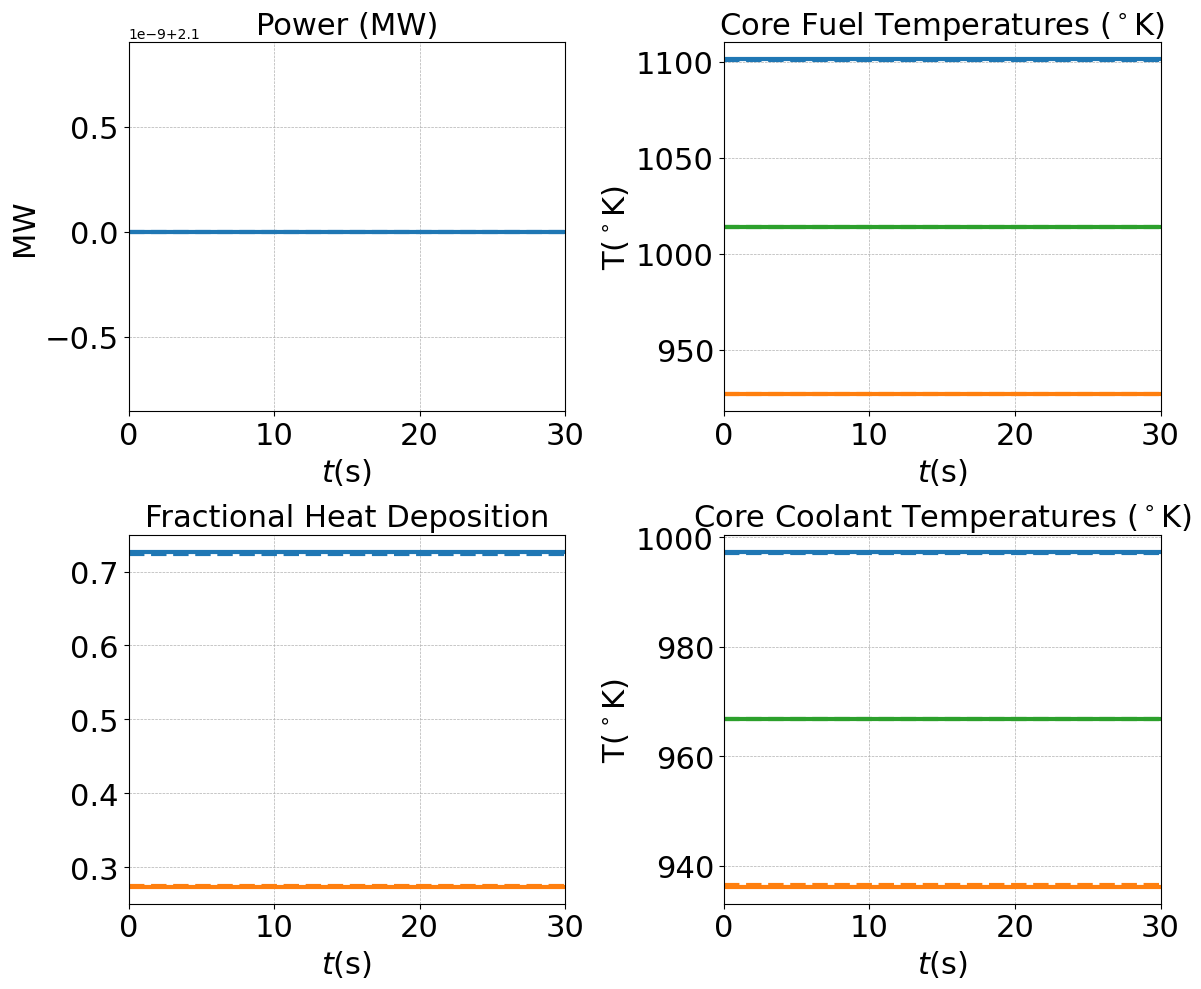

In [57]:
fig,axs = plt.subplots(2,2,figsize=(12,10))

t_0 = 0.0
t_f = 30

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

tls = 22
# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_xlim([t_0, t_f])
    ax.set_title(title,fontsize=tls)
    ax.set_xlabel(x_label,fontsize=tls)
    ax.set_ylabel(y_label,fontsize=tls)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks,labelsize = tls)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,labelsize = tls)
    ax.set_yscale(y_scale)

lw = 3
# power
update_axis_style(axs[0,0], 'Power (MW)', r"$t$(s)", "MW")
axs[0,0].plot(T,P*n.y_out,color=colors[0],linewidth=lw)
axs[0,0].plot(T,P*np.ones(len(T)),linestyle='--',color=colors[0],linewidth=lw)

# Core Node Temperatures
update_axis_style(axs[0,1], r"Core Fuel Temperatures ($^\circ$K)")
axs[0,1].set_xlim([t_0,t_f])
axs[0,1].plot(T,[s[c_f2.index] for s in sol_jit],label="fuel outlet, msrDynamics",color=colors[0],linewidth=lw) 
axs[0,1].axhline(y=F_to_K(1522),label="fuel outlet, ORNL-1845",linestyle="--",color=colors[0],linewidth=lw) 
axs[0,1].plot(T,[(s[hx_fh1_f2.index]+s[hx_fh2_f2.index])/2 for s in sol_jit],label="fuel inlet, msrDynamics",color=colors[1],linewidth=lw) 
axs[0,1].axhline(y=F_to_K(1209),label="fuel inlet, ORNL-1845",linestyle="--",color=colors[1],linewidth=lw) 
axs[0,1].plot(T,[(s[c_f2.index]+(s[hx_fh1_f2.index]+s[hx_fh2_f2.index])/2)/2 for s in sol_jit],label="Mean, msrDynamics",color=colors[2],linewidth=lw) 
axs[0,1].axhline(y=(F_to_K(1522)+F_to_K(1209))/2,label="Mean, ORNL-1845",linestyle="--",color=colors[2],linewidth=lw) 
axs[0,1].set_xlabel(r"$t$(s)")
axs[0,1].set_ylabel(r"T($^\circ$K)")
# axs[0].legend()

# Core Node Temperatures
update_axis_style(axs[1,1], r"Core Coolant Temperatures ($^\circ$K)")
axs[1,1].set_xlim([t_0,t_f])
axs[1,1].plot(T,[s[c_c2.index] for s in sol_jit],label="coolant outlet, msrDynamics",color=colors[0],linewidth=lw) 
axs[1,1].axhline(y=F_to_K(1335),label="coolant outlet, ORNL-1845",linestyle="--",color=colors[0],linewidth=lw) 
axs[1,1].plot(T,[(s[hx_ch1_c2.index]+s[hx_ch2_c2.index])/2 for s in sol_jit],label="coolant inlet, msrDynamics",color=colors[1],linewidth=lw) 
axs[1,1].axhline(y=F_to_K(1226),label="coolant inlet, ORNL-1845",linestyle="--",color=colors[1],linewidth=lw) 
axs[1,1].plot(T,[(s[c_c2.index]+(s[hx_ch1_c2.index]+s[hx_ch2_c2.index])/2)/2 for s in sol_jit],label="Mean, msrDynamics",color=colors[2],linewidth=lw) 
axs[1,1].axhline(y=(F_to_K(1335)+F_to_K(1226))/2,label="Mean, ORNL-1845",linestyle="--",color=colors[2],linewidth=lw) 
axs[1,1].set_xlabel(r"$t$(s)")
axs[1,1].set_ylabel(r"T($^\circ$K)")
# axs[1,1].legend()

# Core Node Temperatures
update_axis_style(axs[1,0], r"Fractional Heat Deposition")
axs[1,0].set_xlim([t_0,t_f])
axs[1,0].axhline(y=1.52/2.1,label="Fractional Power Extraction: Fuel, ORNL",linestyle="--",color=colors[0],linewidth=lw)
axs[1,0].plot(T,[(s[c_f2.index]-(s[hx_fh1_f2.index]+s[hx_fh2_f2.index])/2)*W_f*scp_f/(P*s[n.index]) for s in sol_jit],label="Fractional Power Extraction: Fuel, msrDynamics",linewidth=lw) 
axs[1,0].axhline(y=0.577/2.1,label="Fractional Power Extraction: Coolant, ORNL",linestyle="--",color=colors[1],linewidth=lw)
axs[1,0].plot(T,[(s[c_c2.index]-(s[hx_ch1_c2.index]+s[hx_ch2_c2.index])/2)*W_c*scp_c/(P*s[n.index]) for s in sol_jit],label="Fractional Power Extraction: Coolant, msrDynamics",color=colors[1],linewidth=lw) 
axs[1,0].set_xlabel(r"$t$(s)")
# axs[1,0].legend()


plt.tight_layout()

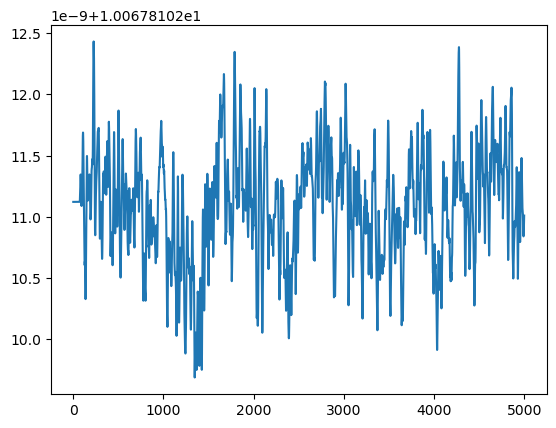

In [58]:
plt.plot(C1.y_out)

In [59]:
rho.y_out[-1]

np.float64(0.001980757840422042)

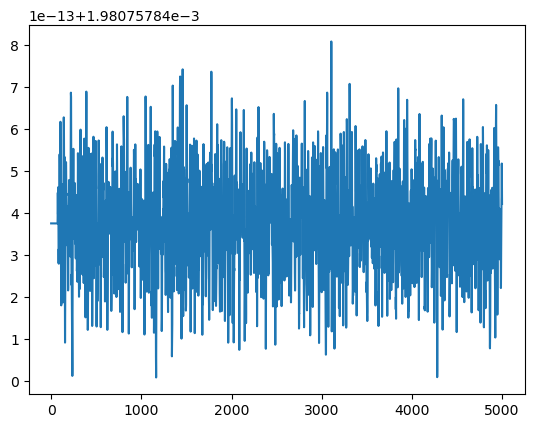

In [60]:
plt.plot(rho.y_out)

In [61]:
power = 2.10 * n.y_out[-1]
dT_fuel = c_f2.y_out[-1] - (hx_fh1_f2.y_out[-1] + hx_fh2_f2.y_out[-1]) / 2
dT_coolant = c_c2.y_out[-1] - (hx_ch1_c2.y_out[-1] + hx_ch2_c2.y_out[-1]) / 2
Q_fuel = scp_f * W_f * dT_fuel
Q_coolant = scp_c * W_c * dT_coolant
Q_fuel_pct = Q_fuel / power
Q_coolant_pct = Q_coolant / power

print(f"power: {power}")
print(f"dT fuel: {dT_fuel}")
print(f"dT coolant: {dT_coolant}")
print(f"Q_fuel: {Q_fuel}")
print(f"Q_coolant: {Q_coolant}")
print(f"Q_fuel pct: {Q_fuel_pct}")
print(f"Q_coolant pct: {Q_coolant_pct}")
print()
print(f"delta P: {(power-2.10)/2.10}")
print(f"delta dTf: {(dT_fuel-174)/174}")
print(f"delta dTc: {(dT_coolant-61)/61}")
print(f"delta Qf: {(Q_fuel-1.52)/1.52}")
print(f"delta Qc: {(Q_coolant-0.58)/0.58}")
print(f"delta Qf_pct: {(Q_fuel_pct-0.72)/0.72}")
print(f"delta Qc_pct: {(Q_coolant_pct-0.28)/0.28}")

power: 2.1000000000707275
dT fuel: 174.5645671358143
dT coolant: 61.2083087624726
Q_fuel: 1.5266084635477628
Q_coolant: 0.5733915366862673
Q_fuel pct: 0.7269564111887367
Q_coolant pct: 0.27304358888902647

delta P: 3.367972567502875e-11
delta dTf: 0.003244638711576358
delta dTc: 0.003414897745452421
delta Qf: 0.004347673386686045
delta Qc: -0.011393902265056311
delta Qf_pct: 0.009661682206578735
delta Qc_pct: -0.02484432539633414
